In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading training and testing Data


In [2]:
df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [3]:
df_train.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,,Low,2018,No,4937,No
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,3,West Bengal,62,,High,2013,NaN,8610,Yes
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


In [4]:
#dropping ID column as it won't contribute in any prediction
df1= df_train.iloc[:,1:]
df1.head()

,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,Uttar Pradesh,28,,Low,2018,No,4937,No
1,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,West Bengal,62,,High,2013,NaN,8610,Yes
3,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


EDA


In [5]:
df1.dtypes

STATE              object
AGE                 int64
OCCUPATION         object
INCOME_GROUP       object
CUSTOMER_SINCE      int64
LOYALTY_PROGRAM    object
PAST_PURCHASE       int64
PURCHASE           object
dtype: object

In [6]:
df1.shape # here 1 column of ID is dropped hence 7 features and 1 label column

(150000, 8)

In [7]:
df_test.shape # here 8 columns label column is we have to predict

(50000, 8)

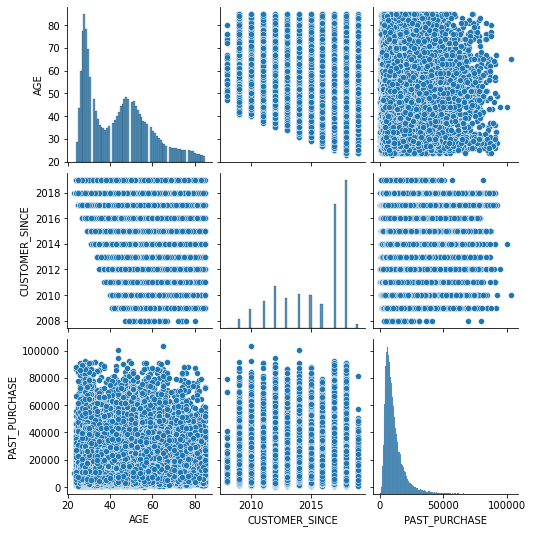

In [8]:
sns.pairplot(df1);

Not enough insights can be drawn from the plot let up carryon with pre_processing

# Data Pre-Processing

In [9]:
df1.columns

Index(['STATE', 'AGE', 'OCCUPATION', 'INCOME_GROUP', 'CUSTOMER_SINCE',
       'LOYALTY_PROGRAM', 'PAST_PURCHASE', 'PURCHASE'],
      dtype='object')

#Treating missing values

In [10]:
df1.isna().sum()

STATE                  0
AGE                    0
OCCUPATION             0
INCOME_GROUP           0
CUSTOMER_SINCE         0
LOYALTY_PROGRAM    17824
PAST_PURCHASE          0
PURCHASE               0
dtype: int64

In [11]:
df1['LOYALTY_PROGRAM'].fillna(df1['LOYALTY_PROGRAM'].mode()[0], inplace=True)
df_test['LOYALTY_PROGRAM'].fillna(df_test['LOYALTY_PROGRAM'].mode()[0], inplace=True)

In [12]:
df1.isna().sum(),df_test.isna().sum()

(STATE              0
 AGE                0
 OCCUPATION         0
 INCOME_GROUP       0
 CUSTOMER_SINCE     0
 LOYALTY_PROGRAM    0
 PAST_PURCHASE      0
 PURCHASE           0
 dtype: int64,
 ID                 0
 STATE              0
 AGE                0
 OCCUPATION         0
 INCOME_GROUP       0
 CUSTOMER_SINCE     0
 LOYALTY_PROGRAM    0
 PAST_PURCHASE      0
 dtype: int64)

We can still see some blank values in OCCUPATION column

In [13]:
df1.head(10)

,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,Uttar Pradesh,28,,Low,2018,No,4937,No
1,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,West Bengal,62,,High,2013,No,8610,Yes
3,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,Uttar Pradesh,40,Self employed,High,2015,No,13158,No
5,Maharashtra,28,Salaried,Low,2018,No,5159,No
6,Tamil Nadu,68,,High,2010,No,12780,Yes
7,Maharashtra,45,Self employed,Medium,2018,No,5018,No
8,West Bengal,56,Self employed,Medium,2014,Yes,7238,No
9,Tamil Nadu,67,,High,2010,Yes,25120,Yes


In [14]:
df1['OCCUPATION'][0]

' '

In [15]:
df1['OCCUPATION'].mode()

0    Self employed
dtype: object

In [16]:
len(df1['OCCUPATION'][df1['OCCUPATION']==' '])

42777

In [17]:
# replacing occupation column blank values by mode as their are large no. of values
df1['OCCUPATION'][df1['OCCUPATION']==' ']=None
df_test['OCCUPATION'][df_test['OCCUPATION']==' ']=None

<ipython-input-17-a33323d215fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['OCCUPATION'][df1['OCCUPATION']==' ']=None
<ipython-input-17-a33323d215fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['OCCUPATION'][df_test['OCCUPATION']==' ']=None


In [18]:
df1['OCCUPATION'].fillna(df1['OCCUPATION'].mode()[0], inplace=True)
df_test['OCCUPATION'].fillna(df_test['OCCUPATION'].mode()[0], inplace=True)

In [19]:
df1.head(10)

,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,Uttar Pradesh,28,Self employed,Low,2018,No,4937,No
1,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,West Bengal,62,Self employed,High,2013,No,8610,Yes
3,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,Uttar Pradesh,40,Self employed,High,2015,No,13158,No
5,Maharashtra,28,Salaried,Low,2018,No,5159,No
6,Tamil Nadu,68,Self employed,High,2010,No,12780,Yes
7,Maharashtra,45,Self employed,Medium,2018,No,5018,No
8,West Bengal,56,Self employed,Medium,2014,Yes,7238,No
9,Tamil Nadu,67,Self employed,High,2010,Yes,25120,Yes


In [20]:
df_test.head(10)

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE
0,150001,Maharashtra,50,Self employed,Medium,2018,No,12746
1,150002,Maharashtra,58,Self employed,High,2011,Yes,12277
2,150003,Andaman and Nicobar Islands,30,Salaried,Low,2017,Yes,16401
3,150004,Mizoram,27,Salaried,Low,2018,Yes,9665
4,150005,Uttar Pradesh,67,Self employed,Medium,2014,No,15724
5,150006,Maharashtra,57,Self employed,High,2010,No,58967
6,150007,Maharashtra,50,Self employed,Medium,2013,No,14527
7,150008,Maharashtra,45,Self employed,Medium,2013,Yes,16032
8,150009,Puducherry,26,Salaried,Low,2018,No,4465
9,150010,Maharashtra,72,Self employed,Low,2014,No,14203


In [21]:
#checkin blank values in train amd test data in INCOME_GROUP
df1['INCOME_GROUP'][10]

' '

In [22]:
df1['INCOME_GROUP'][df1['INCOME_GROUP']==' ']=None
df_test['INCOME_GROUP'][df_test['INCOME_GROUP']==' ']=None

<ipython-input-22-542425cfe4c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['INCOME_GROUP'][df1['INCOME_GROUP']==' ']=None
<ipython-input-22-542425cfe4c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['INCOME_GROUP'][df_test['INCOME_GROUP']==' ']=None


In [23]:
df1.isna().sum(),df_test.isna().sum()

(STATE                 0
 AGE                   0
 OCCUPATION            0
 INCOME_GROUP       3437
 CUSTOMER_SINCE        0
 LOYALTY_PROGRAM       0
 PAST_PURCHASE         0
 PURCHASE              0
 dtype: int64,
 ID                    0
 STATE                 0
 AGE                   0
 OCCUPATION            0
 INCOME_GROUP       1118
 CUSTOMER_SINCE        0
 LOYALTY_PROGRAM       0
 PAST_PURCHASE         0
 dtype: int64)

In [24]:
df1['INCOME_GROUP'].fillna(df1['INCOME_GROUP'].mode()[0], inplace=True)
df_test['INCOME_GROUP'].fillna(df_test['INCOME_GROUP'].mode()[0], inplace=True)

In [25]:
df1.isna().sum(),df_test.isna().sum()

(STATE              0
 AGE                0
 OCCUPATION         0
 INCOME_GROUP       0
 CUSTOMER_SINCE     0
 LOYALTY_PROGRAM    0
 PAST_PURCHASE      0
 PURCHASE           0
 dtype: int64,
 ID                 0
 STATE              0
 AGE                0
 OCCUPATION         0
 INCOME_GROUP       0
 CUSTOMER_SINCE     0
 LOYALTY_PROGRAM    0
 PAST_PURCHASE      0
 dtype: int64)

In [26]:
df1.head(10)

,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,Uttar Pradesh,28,Self employed,Low,2018,No,4937,No
1,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,West Bengal,62,Self employed,High,2013,No,8610,Yes
3,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,Uttar Pradesh,40,Self employed,High,2015,No,13158,No
5,Maharashtra,28,Salaried,Low,2018,No,5159,No
6,Tamil Nadu,68,Self employed,High,2010,No,12780,Yes
7,Maharashtra,45,Self employed,Medium,2018,No,5018,No
8,West Bengal,56,Self employed,Medium,2014,Yes,7238,No
9,Tamil Nadu,67,Self employed,High,2010,Yes,25120,Yes


In [27]:
df1.dtypes

STATE              object
AGE                 int64
OCCUPATION         object
INCOME_GROUP       object
CUSTOMER_SINCE      int64
LOYALTY_PROGRAM    object
PAST_PURCHASE       int64
PURCHASE           object
dtype: object

In [28]:
# checking categorical values
df1['STATE'].unique(),df1['OCCUPATION'].unique(),df1['INCOME_GROUP'].unique(),df1['LOYALTY_PROGRAM'].unique(),df1['PURCHASE'].unique()

(array(['Uttar Pradesh', 'Madhya Pradesh', 'West Bengal', 'Tamil Nadu',
        'Maharashtra', 'Kerala', 'Goa', 'Karnataka', 'Andhra Pradesh',
        'Telangana', 'Chandigarh', 'Nagaland',
        'Andaman and Nicobar Islands', 'Tripura', 'Delhi',
        'Himachal Pradesh', ' ', 'Puducherry', 'Sikkim', 'Gujarat',
        'Odisha', 'Bihar', 'Punjab', 'Arunachal Pradesh', 'Haryana',
        'Rajasthan', 'Uttarakhand', 'Jammu and Kashmir', 'Assam',
        'Manipur', 'Mizoram', 'Jharkhand', 'Chhattisgarh', 'Meghalaya'],
       dtype=object),
 array(['Self employed', 'Salaried', 'Business'], dtype=object),
 array(['Low', 'High', 'Medium'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object))

# Handling STATE col values by changing the values to no. of frequency of occurances

In [29]:
df1['STATE'].value_counts(),df_test['STATE'].value_counts()

(Maharashtra                    21968
 Tamil Nadu                     17836
 Uttar Pradesh                  16400
 Karnataka                      11689
 Gujarat                         7864
 West Bengal                     7751
 Telangana                       4783
 Andhra Pradesh                  4781
 Rajasthan                       4621
 Kerala                          3718
 Madhya Pradesh                  3680
 Delhi                           3572
 Bihar                           3225
 Haryana                         3197
 Punjab                          3113
 Odisha                          2773
 Assam                           2638
 Chhattisgarh                    2366
 Jharkhand                       2242
 Uttarakhand                     1984
 Jammu and Kashmir               1962
                                 1842
 Himachal Pradesh                1763
 Goa                             1735
 Tripura                         1735
 Chandigarh                      1583
 Puducherry 

In [30]:
#Trainig data state values conversion
arr_state=df1['STATE'].value_counts()
for i in range(arr_state.shape[0]):
    df1['STATE'][df1['STATE']==arr_state.index[i]]=arr_state.values[i]

<ipython-input-30-c7f71db9923a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['STATE'][df1['STATE']==arr_state.index[i]]=arr_state.values[i]


In [31]:
#Testing data state values conversion
arr_state=df_test['STATE'].value_counts()
for i in range(arr_state.shape[0]):
    df_test['STATE'][df_test['STATE']==arr_state.index[i]]=arr_state.values[i]

<ipython-input-31-0290cee5d289>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['STATE'][df_test['STATE']==arr_state.index[i]]=arr_state.values[i]


In [32]:
df1.head(5)

,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,16400,28,Self employed,Low,2018,No,4937,No
1,3680,27,Salaried,Low,2018,No,10834,No
2,7751,62,Self employed,High,2013,No,8610,Yes
3,17836,27,Salaried,Low,2018,No,14374,Yes
4,16400,40,Self employed,High,2015,No,13158,No


In [33]:
df1['STATE'].unique(),df1['OCCUPATION'].unique(),df1['INCOME_GROUP'].unique(),df1['LOYALTY_PROGRAM'].unique(),df1['PURCHASE'].unique()

(array([16400, 3680, 7751, 17836, 21968, 3718, 1735, 11689, 4781, 4783,
        1583, 1133, 955, 3572, 1763, 1842, 1503, 1200, 7864, 2773, 3225,
        3113, 1065, 3197, 4621, 1984, 1962, 2638, 1108, 984, 2242, 2366,
        1231], dtype=object),
 array(['Self employed', 'Salaried', 'Business'], dtype=object),
 array(['Low', 'High', 'Medium'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object))

# Carrying out Label Encoding for Ordinal Values like 'INCOME_GROUP' and rest one-hot encoding on nominal variables

In [34]:
#Ordinal ENcoding of INCOME GROUP
#training
df1['INCOME_GROUP'][df1['INCOME_GROUP']=='Low']=1
df1['INCOME_GROUP'][df1['INCOME_GROUP']=='Medium']=2
df1['INCOME_GROUP'][df1['INCOME_GROUP']=='High']=3
#testing
df_test['INCOME_GROUP'][df_test['INCOME_GROUP']=='Low']=1
df_test['INCOME_GROUP'][df_test['INCOME_GROUP']=='Medium']=2
df_test['INCOME_GROUP'][df_test['INCOME_GROUP']=='High']=3

#Nominal variable Encoding
#training
df1['LOYALTY_PROGRAM'][df1['LOYALTY_PROGRAM']=='Yes']=1
df1['LOYALTY_PROGRAM'][df1['LOYALTY_PROGRAM']=='No']=0
df1['PURCHASE'][df1['PURCHASE']=='Yes']=1
df1['PURCHASE'][df1['PURCHASE']=='No']=0
#testing
df_test['LOYALTY_PROGRAM'][df_test['LOYALTY_PROGRAM']=='Yes']=1
df_test['LOYALTY_PROGRAM'][df_test['LOYALTY_PROGRAM']=='No']=0
# Dummy Variable Encoding of 'OCCUPATION'
# training
df1=pd.concat([df1,pd.get_dummies(df1.OCCUPATION)],axis='columns')
df1=df1.drop(['OCCUPATION','Self employed'],axis=1)
#testing
df_test=pd.concat([df_test,pd.get_dummies(df_test.OCCUPATION)],axis='columns')
df_test=df_test.drop(['OCCUPATION','Self employed'],axis=1)

<ipython-input-34-06da8e4b14bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['INCOME_GROUP'][df1['INCOME_GROUP']=='Low']=1
<ipython-input-34-06da8e4b14bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['INCOME_GROUP'][df1['INCOME_GROUP']=='Medium']=2
<ipython-input-34-06da8e4b14bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['INCOME_GROUP'][df1['INCOME_GROUP']=='High']=3
<ipython-input-34-06da8e4b14bc>:7: Setting

In [35]:
df1.head()

,STATE,AGE,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE,Business,Salaried
0,16400,28,1,2018,0,4937,0,0,0
1,3680,27,1,2018,0,10834,0,0,1
2,7751,62,3,2013,0,8610,1,0,0
3,17836,27,1,2018,0,14374,1,0,1
4,16400,40,3,2015,0,13158,0,0,0


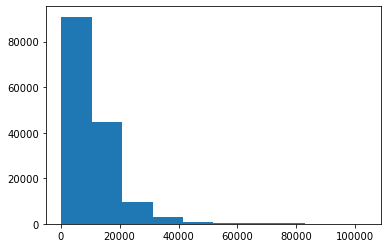

In [36]:
plt.hist(df1['PAST_PURCHASE']);

As PAST_PURCHASE and AGE is highly skewed we can log transform

(array([1.0000e+00, 1.6000e+01, 1.3300e+02, 1.8300e+03, 1.6877e+04,
        5.2869e+04, 5.1647e+04, 2.1228e+04, 4.6610e+03, 7.3800e+02]),
 array([ 5.33753808,  5.95853628,  6.57953449,  7.20053269,  7.82153089,
         8.44252909,  9.0635273 ,  9.6845255 , 10.3055237 , 10.92652191,
        11.54752011]),
 <BarContainer object of 10 artists>)

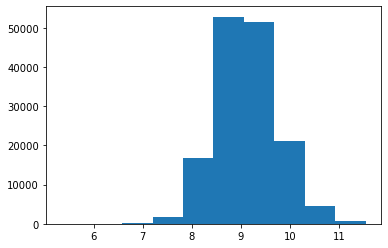

In [37]:
df1['log_PAST_PURCHASE']=np.log(df1['PAST_PURCHASE'])
plt.hist(df1['log_PAST_PURCHASE'])

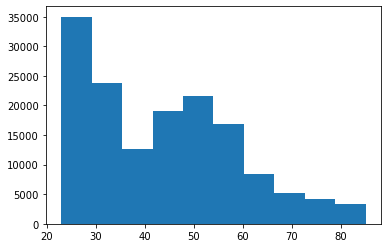

In [38]:
plt.hist(df1['AGE']);

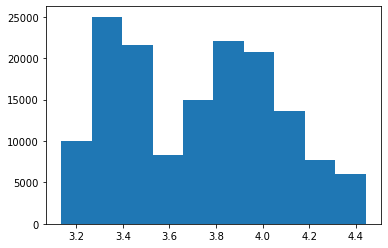

In [39]:
df1['log_AGE']=np.log(df1['AGE'])
plt.hist(df1['log_AGE']);

In [40]:
df_test['log_PAST_PURCHASE']=np.log(df_test['PAST_PURCHASE'])
df_test['log_AGE']=np.log(df_test['AGE'])
df1=df1.drop(['PAST_PURCHASE','AGE'],axis=1)
df_test=df_test.drop(['PAST_PURCHASE','AGE'],axis=1)
df1.head()

,STATE,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PURCHASE,Business,Salaried,log_PAST_PURCHASE,log_AGE
0,16400,1,2018,0,0,0,0,8.504513,3.332205
1,3680,1,2018,0,0,0,1,9.290445,3.295837
2,7751,3,2013,0,1,0,0,9.060680,4.127134
3,17836,1,2018,0,1,0,1,9.573176,3.295837
4,16400,3,2015,0,0,0,0,9.484785,3.688879


In [41]:
# Normalizing all quantitative variables
def norm_(series):
    series = (series - min(series))/(max(series)-min(series))
    return series
#training
df1.STATE=norm_(df1.STATE)
df1.log_AGE=norm_(df1['log_AGE'])
df1.LOYALTY_PROGRAM=norm_(df1.LOYALTY_PROGRAM)
df1.log_PAST_PURCHASE=norm_(df1['log_PAST_PURCHASE'])
df1.INCOME_GROUP=norm_(df1.INCOME_GROUP)
df1.CUSTOMER_SINCE=norm_(df1.CUSTOMER_SINCE)
#testing
df_test.STATE=norm_(df_test.STATE)
df_test.log_AGE=norm_(df_test.log_AGE)
df_test.log_PAST_PURCHASE=norm_(df_test['log_PAST_PURCHASE'])
df_test.LOYALTY_PROGRAM=norm_(df_test.LOYALTY_PROGRAM)
df_test.INCOME_GROUP=norm_(df_test.INCOME_GROUP)
df_test.CUSTOMER_SINCE=norm_(df_test.CUSTOMER_SINCE)
df1.head()

,STATE,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PURCHASE,Business,Salaried,log_PAST_PURCHASE,log_AGE
0,0.735021,0,0.909091,0,0,0,0,0.509981,0.150487
1,0.129682,0,0.909091,0,0,0,1,0.636541,0.122665
2,0.323419,1,0.454545,0,1,0,0,0.599541,0.758624
3,0.80336,0,0.909091,0,1,0,1,0.682069,0.122665
4,0.735021,1,0.636364,0,0,0,0,0.667836,0.423350


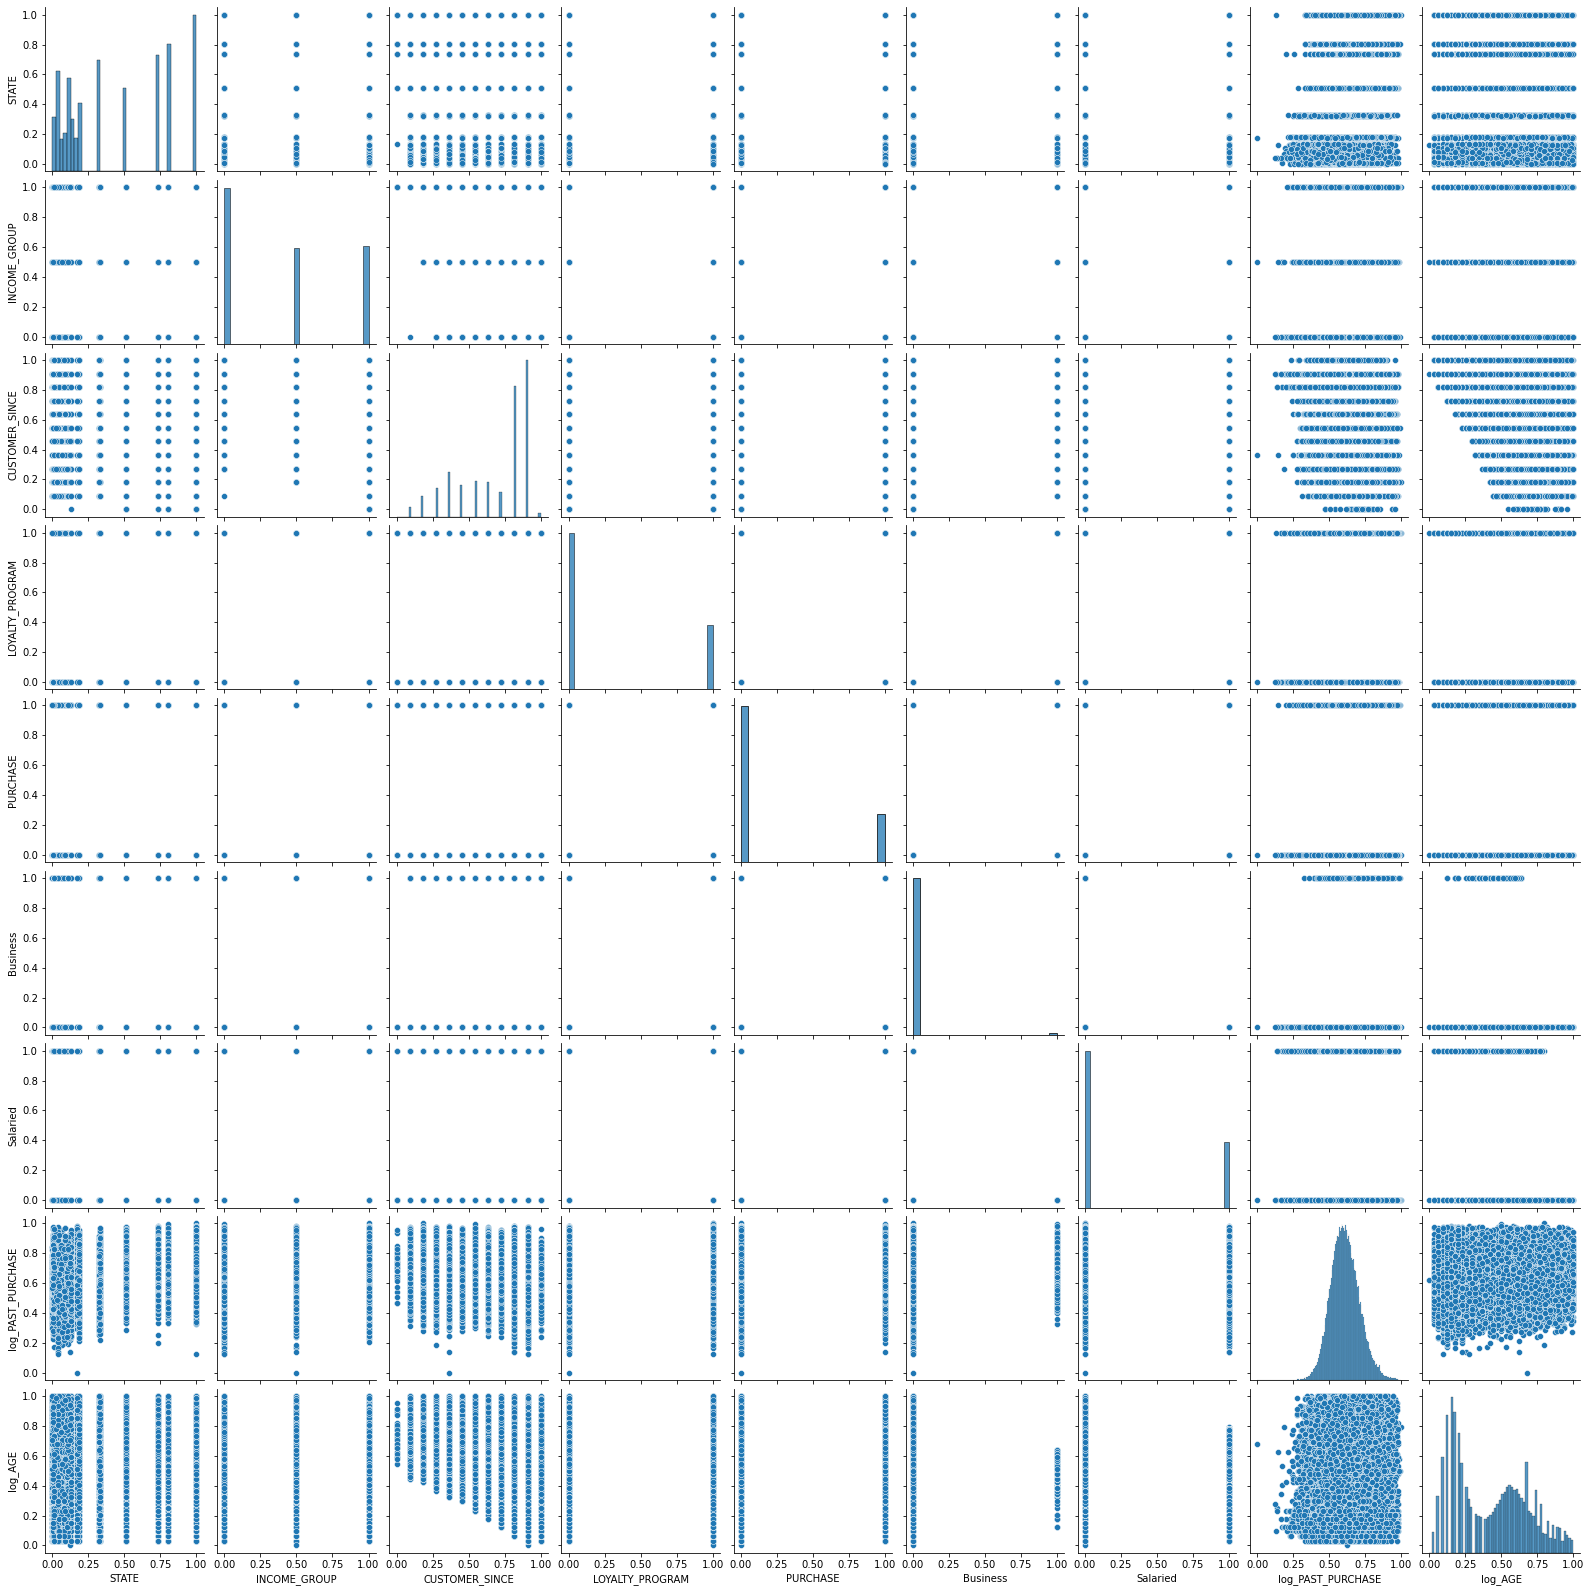

In [42]:
sns.pairplot(df1);

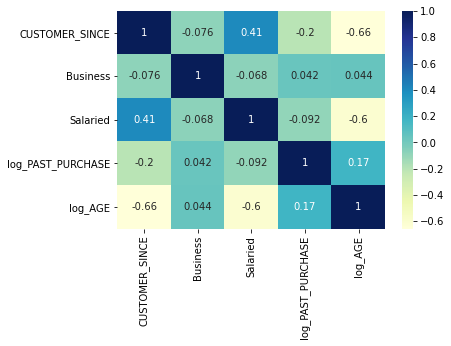

In [43]:
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap

<AxesSubplot:>

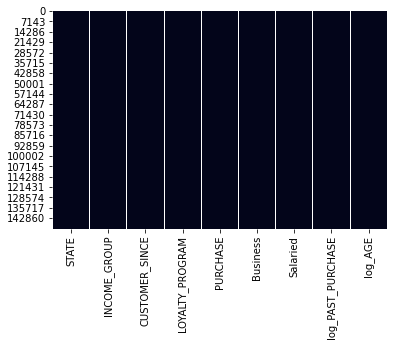

In [44]:
sns.heatmap(df1.isnull(), cbar=False)

In [45]:
#checking dataset is balanced or not
df1['PURCHASE'].value_counts()
#dataset is unbalaced

0    114537
1     35463
Name: PURCHASE, dtype: int64

In [46]:
X=df1.drop(['PURCHASE'],axis=1)
y=df1['PURCHASE']
y=y.astype('int')

In [47]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm =smote.fit_sample(X,y)
X_sm.head()

,STATE,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,Business,Salaried,log_PAST_PURCHASE,log_AGE
0,0.735021,0,0.909091,0,0,0,0.509981,0.150487
1,0.129682,0,0.909091,0,0,1,0.636541,0.122665
2,0.323419,1,0.454545,0,0,0,0.599541,0.758624
3,0.80336,0,0.909091,0,0,1,0.682069,0.122665
4,0.735021,1,0.636364,0,0,0,0.667836,0.423350


Now the data is balanced using smote

In [48]:
y_sm.value_counts()

1    114537
0    114537
Name: PURCHASE, dtype: int64

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
clf=LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred))

Accuracy: 0.6671177561933864
Precision: 0.6694843258856512
Recall: 0.6784469028453359
F1 score: 0.6739358176725889


Cannot able to achieve good accuracy and F1 scores using Logistic regression let us try out Random forest classifier

In [50]:
clf=RandomForestClassifier(n_estimators=60)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred))

Accuracy: 0.810957110116774
Precision: 0.8111120601298257
Recall: 0.8175713486289872
F1 score: 0.8143288957489228


In [51]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

log_PAST_PURCHASE    0.341618
log_AGE              0.314385
STATE                0.154256
CUSTOMER_SINCE       0.093670
INCOME_GROUP         0.059031
Salaried             0.020254
LOYALTY_PROGRAM      0.011596
Business             0.005191
dtype: float64

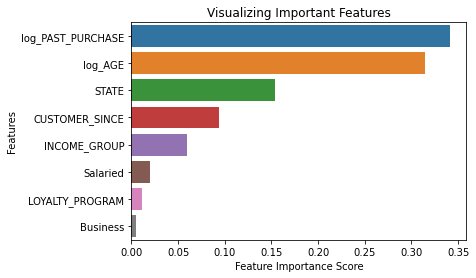

In [52]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

As we can see feature Business is not important for selection we can check by dropping it alog with salaried as both are together representing 1 feature

In [53]:
X_train.head()

,STATE,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,Business,Salaried,log_PAST_PURCHASE,log_AGE
105726,0.124542,0.5,0.727273,0,0,0,0.529956,0.594059
146793,0.0371199,1,0.181818,0,0,0,0.669273,0.770864
127030,0.735021,0,0.909091,0,0,1,0.622656,0.122665
106920,1,1,0.181818,0,0,0,0.513434,0.953621
135832,0.106696,0,0.818182,0,0,1,0.592449,0.342747


In [54]:
X_train1,X_test1=X_train.drop(['Business','Salaried'],axis=1),X_test.drop(['Business','Salaried'],axis=1)

In [55]:
clf=RandomForestClassifier(n_estimators=60)
clf.fit(X_train1,y_train)
y_pred=clf.predict(X_test1)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred))

Accuracy: 0.7963549055986031
Precision: 0.7932329241024343
Recall: 0.8093495759975894
F1 score: 0.8012102100822432


Since accuracy has dropped dropping is not a good idea hence, retaining the features

In [56]:
# fitting the model with all training values
clf=RandomForestClassifier(n_estimators=60)
clf.fit(X_sm,y_sm)

RandomForestClassifier(n_estimators=60)

In [57]:
df_test.head()

,ID,STATE,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,Business,Salaried,log_PAST_PURCHASE,log_AGE
0,150001,1,0.5,0.909091,0,0,0,0.621767,0.580397
1,150002,1,1,0.272727,1,0,0,0.614750,0.697763
2,150003,0.00169062,0,0.818182,1,0,1,0.668960,0.176454
3,150004,0,0,0.909091,1,0,1,0.569973,0.093139
4,150005,0.715131,0.5,0.545455,0,0,0,0.661070,0.811831


In [58]:
predicted_values=clf.predict(df_test.drop(['ID'],axis=1))

In [59]:
predicted_values

array([1, 1, 0, ..., 1, 0, 0])

In [60]:
predicted_values= np.where(predicted_values==1, 'Yes', 'No')

In [61]:
predicted_values

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype='<U3')

In [62]:
df_test=pd.concat([df_test,pd.DataFrame(predicted_values)],axis=1)

In [63]:
df_test.rename(columns={0: 'PURCHASE'},inplace=True)
df_test=df_test[['ID','PURCHASE']]
df_test.head()

,ID,PURCHASE
0,150001,Yes
1,150002,Yes
2,150003,No
3,150004,No
4,150005,No


In [64]:
df_test.to_csv("submission.csv",index=False)